In [81]:
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sbs
from scipy.constants import pi
os.sys.path.append('/home/vgubaidulin/PhD/Code/Numerical/Stability_diagrams/')
sbs.set(rc={'figure.figsize': (2*8.3, 2*5.2),
            'text.usetex': True,
            'font.family': 'serif',
            'font.size': 20,
            'axes.linewidth': 2,
            'lines.linewidth': 3,
            'legend.fontsize': 16,
            'legend.numpoints': 1, },
               style='ticks',
        palette='colorblind',
        context='talk')
from Schenk import *
from SIS100_H_functions import *

In [82]:
def B_sum(phi, J_z, n_max=100):
    n=np.linspace(1, n_max, n_max, dtype=np.int64)
    return np.sum(np.sin(2*np.tensordot(phi, n, axes=0))*ive(n, .5*J_z)/n, axis=1)
def RFQ_sum(phi, J_z, n_max=100):
    n=np.linspace(1, n_max, n_max, dtype=np.int64)
    return np.sum(np.sin(2*np.tensordot(phi, n, axes=0))*jv(2*n, np.sqrt(2*J_z))/n*(-1)**n, axis=1)
def RFQ_sum2(phi, J_z, n_max=100):
    n=np.linspace(1, n_max, n_max, dtype=np.int64)
    return np.sum(np.cos(np.tensordot(phi, 2*n-1, axes=0))*jv(2*n-1, np.sqrt(2*J_z))/n*(-1)**n, axis=1)
phi=np.linspace(0, 2*pi, 2000)


In [83]:
%%timeit
B(B_integrand_RFQ, Jz=2, phi=phi)/dQmax

9.55 s ± 240 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [84]:
%%timeit
B_sum(phi, J_z=2)

808 µs ± 13 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [85]:
%%timeit
B(B_integrand_RFQ, Jz=2, phi=phi)/dQmax

9.18 s ± 225 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [89]:
%%timeit
RFQ_sum(phi, J_z=2)

932 µs ± 36.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%%time
from scipy.special import iv, ive
sbs.set(rc={'figure.figsize':(8.3,5.2),
            'text.usetex':True,
           'font.family':'serif',
           'font.size':36,
           'axes.linewidth':2,
           'lines.linewidth':3,
           'legend.fontsize':16,
           'legend.numpoints':1,},
        style='ticks',
        palette='colorblind',
        context='talk')
palette = sbs.color_palette('RdBu')
phi = np.linspace(0, 2*pi, 1000)
Jz = np.linspace(0, 3, 100)
J=2
fig, ax = plt.subplots(1, 1)
dQmax=1e-3
# ax.plot(phi, -B(B_integrand_RFQ, Jz=J, phi=phi) /
#         dQmax,  label='RFQ', color=palette[-2], alpha=0.8)
# ax.plot(phi, B_sum(phi, J_z=J),  label='RFQ', color='black', linewidth=4, linestyle='dashdot')
# ax.plot(phi, -RFQ_sum2(phi, J_z=J),  label='RFQ', color='black', linewidth=4, linestyle='dashed')

# ax2.plot(Jz, Q_average_detuning_RFQ(Jz) /
#         dQmax, color=palette[-2], alpha=0.8)

# ax.plot(phi, -B(B_integrand_Qpp, Jz=J, phi=phi) /
#         dQmax,  label='$\\xi^{(2)}$', color='#2C664F', alpha=0.8, linewidth=4)
# # ax2.plot(Jz, np.abs(Q_average_detuning_Qpp(Jz)) /
# #         dQmax, color='#2C664F', alpha=0.8, linewidth=4)

# ax.plot(phi, .1*B(B_integrand_Qp, Jz=J, phi=phi) /
#         dQmax,  label='$0.1\\xi^{(1)}$', color='#008080', alpha=0.8)
# # ax2.axhline(0, color='#008080')

ax.plot(phi, B(B_integrand, Jz=J, phi=phi) /
        dQmax,  label='PEL', color=palette[-1], linewidth=5)

ax.plot(phi, B_sum(phi, J_z=J),  label='PEL', color='black', linewidth=5, linestyle='dashed')
# ax2.plot(Jz, Q_average_detuning(Jz) /
#         dQmax, color=palette[-1], linewidth=5)

ax.set_xlabel('$\\varphi_z$')
ax.set_ylabel(
    '$B(J_z, \\varphi)$ [$\Delta Q_\mathrm{max}/Q_s$]')
# ax2.set_xlabel('$\hat{J_z}$')
# ax2.set_ylabel(
#     '$| \langle Q \\rangle_\phi (\hat{J_z})|$ [$\Delta Q_\mathrm{max}$]')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax2.spines['top'].set_visible(False)
# ax2.spines['right'].set_visible(False)
ax.set_xlim(0, 2*pi)
# ax.set_ylim(-.4, .4)
# ax2.set_ylim(-0.05, 1)
ticks = np.linspace(0, 2*pi, 9)
ax.set_xticks(ticks)
ax.minorticks_on()
# ax2.minorticks_on()

ax.set_xticklabels(
    ['$0$',
     '$\\frac{\pi}{4}$',
     '$\\frac{\pi}{2}$',
     '$\\frac{3\pi}{4}$',
     '$\pi$',
     '$\\frac{5\pi}{4}$',
     '$\\frac{3\pi}{2}$',
     '$\\frac{7\pi}{4}$',
     '$2\pi$'],)
ax.xaxis.grid()
ax.text(0.05, -0.35, 'HEAD', alpha=.25, c='grey')
ax.text(7/8*pi, -0.35, 'TAIL', alpha=.25, c='grey')
ax.text(3/2*pi, -0.35, 'HEAD', alpha=.25, c='grey')

plt.figlegend(frameon=False)
# plt.savefig('/home/vgubaidulin/PhD/Code/Numerical/Stability_diagrams/Results/'+'B.pdf', bbox_inches='tight')
# plt.savefig('/home/vgubaidulin/PhD/Results/'+'B.pdf', bbox_inches='tight')
plt.show()

In [51]:
l=0
n=np.linspace(1, 10, 10, dtype=np.int64)
z_1 = 1
z_2 = 0.5
print(np.sum(jv(n, z_2)*(jv(2*n-l, z_1)+(-1)**(l+3*n)*jv(2*n+l, z_1))))

0.0001515902642029054


In [90]:
@np.vectorize
def H(z_1, z_2, l: np.int64 = 0, n_max: np.int64 =20):
    n=np.linspace(-n_max, n_max, 2*n_max+1, dtype=np.int64)
    a = jv(n, z_2)
    b = jv(l-2*n, z_1)
    return 1j**(-l)*np.dot(a, b)

In [91]:
%%timeit
z_1 = np.linspace(-1, 1, 10)
H(z_1, 0, l=1)

958 µs ± 12.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [92]:
%%timeit
z_1 = np.linspace(-1, 1, 10)
jv(0, z_1)

29.4 µs ± 2.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
a = np.array([0, 1, 2, 3, 4])
print(np.tile(a, reps=(3, 1)))

In [9]:
from scipy.signal import fftconvolve
Q_x = 20.13
def res_impedance(p, l=0):
    R=1100
    omega_0=c/R
    omega = (p+Q_x+l*Q_s)*omega_0
    Q = 1
    Rs = 1e7
    omega_r = 2*pi*8e8
    return omega_r/omega*Rs/(1-1j*Q*(omega_r/omega-omega/omega_r))
def res_wall(p, l=0):
    omega = (p+Q_x+l*Q_s)*omega_0
    
def K(N):
    N=1e9
    gamma = 27.7
    R=1100
    omega_b = omega_0*Q_x
    T0 = 2*pi*R/c
    E = gamma*m_p*c**2
    return N*e**2*c/(2*omega_b*T0**2*E)
@np.vectorize
def eff_impedance(xi_1, l=0):
    p = np.linspace(-10000, 10000, 200001)
    omega = omega_0*(p+Q_x+l*Q_s)
    beta_z = 115
    J_z = 3e-4
    r = np.sqrt(2*J_z*beta_z)
    x = xi_1/beta_z*Q_x/Q_s
    y = omega/c
#     xg, yg = np.meshgrid(x, y)
    z_1 = r*(x-y)
    print(x)
#     Spectrum = np.abs(H(z_1, 0, l))**2
#     Z = fftconvolve(Spectrum, np.tile(res_impedance(p, l), reps=(xg.shape[1], 1)))
#     Z = np.dot(Spectrum, res_impedance(p, l))
    Z = np.dot(jv(l, z_1)**2, res_impedance(p, l))
    return Z
@np.vectorize
def eff_impedanceb(xi_1, l=0):
    p = np.linspace(-10000, 10000, 20001, dtype=np.int32)
    omega = omega_0*(p+Q_x+l*Q_s)
    beta_z = 115
    J_z = 3e-4
    r = np.sqrt(2*J_z*beta_z)
    x = xi_1/beta_z*Q_x/Q_s
    y = omega/c
#     xg, yg = np.meshgrid(x, y)
    z_1 = r*(x-y)
#     Spectrum = np.abs(jv(l, z_1))**2
    Z = np.dot(np.abs(H(z_1, 0, l))**2, res_impedance(p, l))
#     Z = fftconvolve(Spectrum, np.tile(res_impedance(p, l), reps=(xg.shape[1], 1)))
    return Z
@np.vectorize
def eff_impedance2(xi_2, l=0):
    p = np.linspace(-100000, 100000, 200001)
    omega = omega_0*(p+Q_x+l*Q_s)
    xi_1 = 0.25
    beta_z = 115
    J_z = 3e-4
    r = np.sqrt(2*J_z*beta_z)
    z_1 = r*(xi_1/beta_z*Q_x/Q_s-omega/c)
    z_2 = (r**2/8/beta_z**2*Q_x/Q_s*xi_2)
    Z = np.dot(np.abs(H(z_1, z_2, l))**2, res_impedance(p, l))
    return Z
print(K(0))
eff_impedance(-1)

1.2223242717858653e-09
-100.59970014992503
-100.59970014992503


array(-4.63440966e+09+3.34426261e+10j)

/home/vgubaidulin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


<StemContainer object of 3 artists>

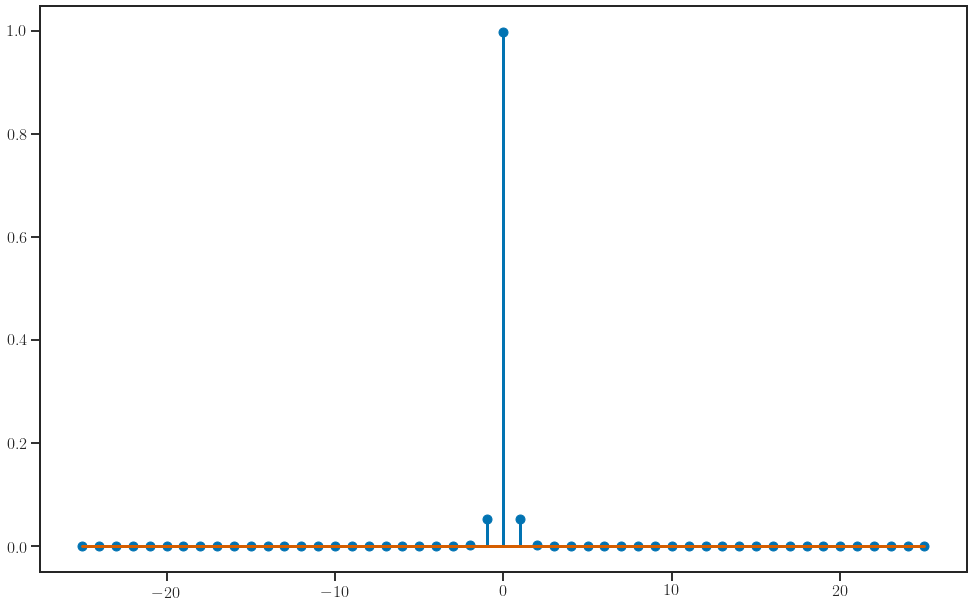

In [731]:
z_2 = .5*ive(1, 1)#np.sqrt(2*beta_z*J_z)*(-np.sqrt(2*beta_z*J_z)/8/beta_z*Q_x/Q_s*xi_2)
fig, ax  = plt.subplots(1, 1)
n = np.linspace(-25, 25, 51, dtype=np.int64)
ax.stem(n, np.abs(jv(n, z_2)))

CPU times: user 3min, sys: 651 ms, total: 3min
Wall time: 2min 54s


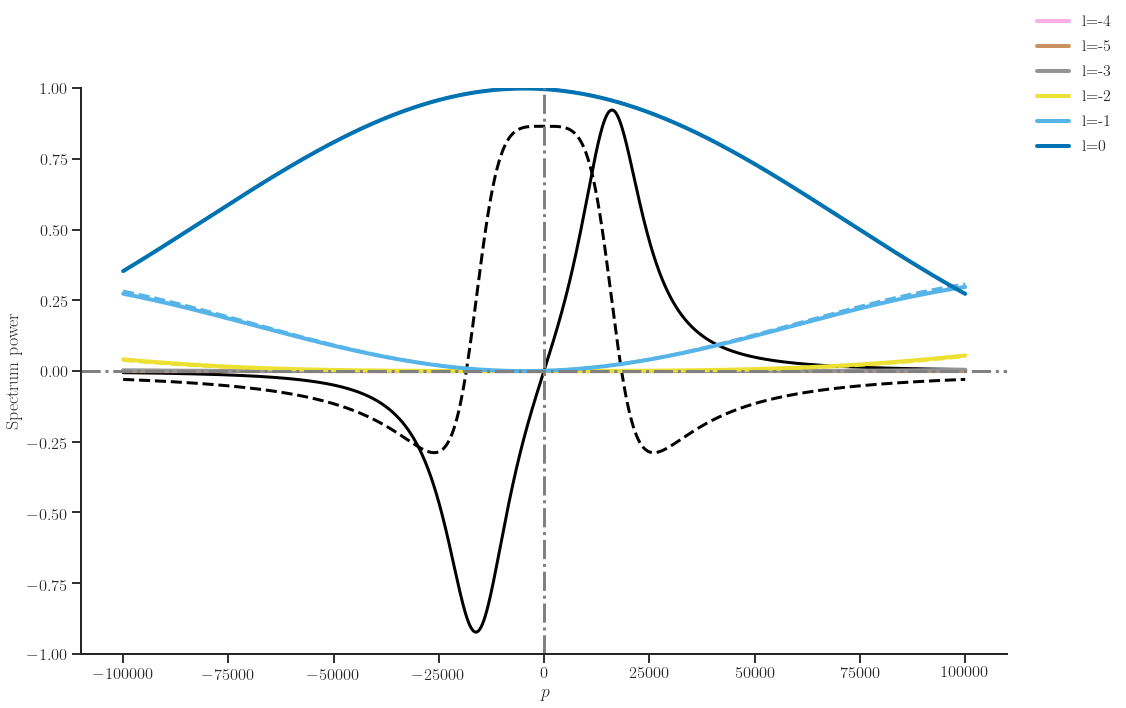

In [780]:
%%time
p = np.linspace(-100000, 100000, 200001)
Q_s = 0.017
fig, ax = plt.subplots(1, 1)

ax.plot(p, np.real(res_impedance(p))/max(np.abs(res_impedance(p))), c='black')
ax.plot(p, np.imag(res_impedance(p))/max(np.abs(res_impedance(p))), c='black', linestyle='dashed')
xi_1 = -0.25
omega = omega_0*(p+Q_x+l*Q_s)
z_1 = np.sqrt(2*beta_z*J_z)*(1/beta_z*Q_x/Q_s*xi_1-omega/c)
# for i, m in enumerate(np.linspace(-3, 0, 4, dtype=np.int64)):
# m = -1
for m in [-4, -5, -3, -2, -1, 0]:
#     xi_2 = -5
    z_2 = 0.147*ive(1, 1)#np.sqrt(2*beta_z*J_z)*(-np.sqrt(2*beta_z*J_z)/8/beta_z*Q_x/Q_s*xi_2)
    ax.plot(p, np.abs(H(z_1, z_2, l=m))**2, c=palette[m], label='l={0:}'.format(m), linewidth=4)
    ax.plot(p, np.abs(jv(m, z_1))**2, color=palette[m], linestyle='dashed', linewidth=3)
ax.set_ylim(-1, 1)
ax.axvline(0, color='grey', linestyle='dashdot')
ax.axhline(0, color='grey', linestyle='dashdot')
# ax.set_xlim(p[0]//2, p[-1]//2)

# ax.axvline(-c/0.06/omega0)
ax.set_xlabel('$p$')
ax.set_ylabel('Spectrum power')
plt.figlegend(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [749]:
Zx_real = np.load('/home/vgubaidulin/PhD/Results/Zreal_LHC.npy')
Zx_imag = np.load('/home/vgubaidulin/PhD/Results/Zimag_LHC.npy')
fftfreq = np.load('/home/vgubaidulin/PhD/Results/Zfreq_LHC.npy')

1311186865.4915504 0.3100000000000023
1311186865.4915504 0.3100000000000023
1311186865.4915504 0.3100000000000023
1311186865.4915504 0.3100000000000023
1311186865.4915504 0.3100000000000023
CPU times: user 1min 52s, sys: 370 ms, total: 1min 52s
Wall time: 1min 46s


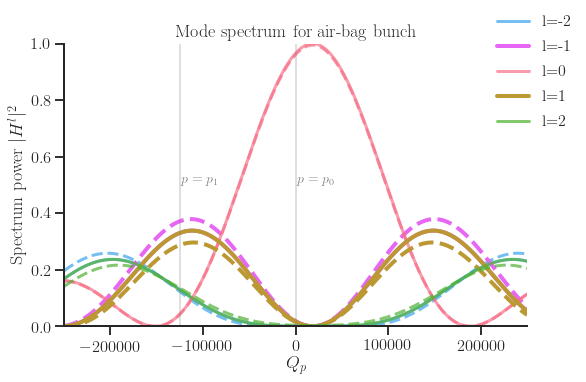

In [93]:
%%time
sbs.set(rc={'figure.figsize':(8.3,5.2),
            'text.usetex':True,
           'font.family':'serif',
           'font.size':36,
           'axes.linewidth':2,
           'lines.linewidth':4,
           'legend.fontsize':16,
           'legend.numpoints':1,},
        style='ticks',
        palette='colorblind',
        context='talk')
p = np.linspace(-1000000, 1000000, 200001)
Q_s = 1.74e-3
fig, ax = plt.subplots(1, 1)
palette = sbs.color_palette('husl')
beta_z = 815
xi_1 = .1
J_z = 0.06**2/(2*beta_z)
omega_0 = 2*pi*c/(26658.883)
Q_x = 60.31
H_summed = 0
J_summed = 0
plot_lines = []
for m in [-2, -1, 0, 1, 2]:
    omega = omega_0*(p+Q_x-np.floor(Q_x)+m*Q_s)
    omega_xi = omega_0*Q_x*xi_1/(0.000325)
    print(omega_xi, Q_x-np.floor(Q_x))
    z_1 = np.sqrt(2*beta_z*J_z)*(omega_xi/c-omega/c)
    lw = 4 if m==-1 or m==1 else 3
    alpha = 1 if m==-1 or m==1 else .7
    l1 = ax.plot(omega/omega_0, np.abs(jv(m, z_1))**2,
                 color=palette[m],
                 label='l={0:}'.format(m),
                 linestyle='solid',
                 linewidth=lw,
                 alpha=alpha)
    z_2 = .5*ive(1, 1)
    l3 = ax.plot(omega/omega_0, np.abs(H(z_1, z_2, l=m))**2,
                 c=palette[m],
                 linewidth=lw,
                 alpha=alpha,
                 linestyle='dashed')
    plot_lines.append([l1, l3])

ax.set_xlabel('$Q_p$')
ax.set_ylabel('Spectrum power $|H^l|^2$')
ax.title.set_text('Mode spectrum for air-bag bunch')
plt.figlegend(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(0, 1.)
ax.set_xlim(-250000, 250000)
p0, p1, p2 = 0, -125000, -220000
ax.axvline(p0, c='grey', alpha=.25, linewidth=2)
ax.axvline(p1, c='grey', alpha=.25, linewidth=2)
ax.text(p0, .5, '$p=p_0$', color='grey', fontsize=14)
ax.text(p1, .5, '$p=p_1$', color='grey', fontsize=14)

plt.savefig('/home/vgubaidulin/PhD/Results/H-spectrum.pdf', bbox_inches='tight')

CPU times: user 299 ms, sys: 4.09 ms, total: 303 ms
Wall time: 309 ms


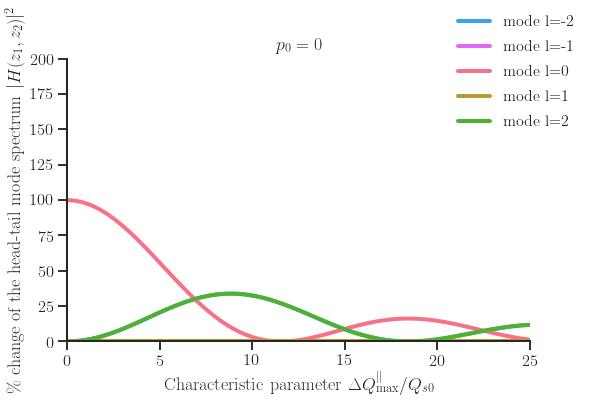

In [94]:
%%time
k = np.linspace(0, 25, 100)
z_2 = k*ive(1, 1)
# p=-220000
# p=-125000
p=0
xi_1 = .1
palette = sbs.color_palette('husl')
l=1
# for xi_1 in [-1., -.5, 0, .5, 1.]:
omega = omega_0*(p+Q_x+l*Q_s)
omega_xi = 0#omega_0*Q_x*xi_1/(0.00325)
z_1 = -np.sqrt(2*beta_z*J_z)*(omega_xi/c-omega/c)
fig, ax = plt.subplots(1, 1)
for m in [-2, -1, 0, 1, 2]:
    N = np.abs(H(z_1, 0, l=0))**2
    ax.plot(k, 100*np.abs(H(z_1, z_2, l=m))**2/N,
            label='mode l={0:}'.format(m),
           color=palette[m])
ax.set_xlim(min(k), max(k))
ax.set_ylim(0, 200)
ax.set_xlabel('Characteristic parameter $\Delta Q^\parallel_\mathrm{max}/Q_{s0}$')
ax.set_ylabel('\% change of the head-tail mode spectrum $|H(z_1, z_2)|^2$')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title('$p_0 = 0$')
plt.figlegend(frameon=False)
plt.savefig('/home/vgubaidulin/PhD/Results/LHC_HT_spectrum_l0.pdf', bbox_inches='tight')
# plt.xlim(0, 2)

In [ ]:
%%time
k = np.linspace(0, 25, 50)
z_2 = 0*k*ive(1, 1)
p=-220000#125000
xi_1 = .1
palette = sbs.color_palette('husl')

# for xi_1 in [-1., -.5, 0, .5, 1.]:
omega = omega_0*(p+Q_x+l*Q_s)
omega_xi = omega_0*Q_x*xi_1/(0.00325)
z_1 = np.linspace(0, 20, 200)#-np.sqrt(2*beta_z*J_z)*(omega_xi/c-omega/c)
fig, ax = plt.subplots(1, 1)
for m in [-2, -1, 0, 1, 2]:
    N = np.abs(H(z_1, 0, l=2))**2
    ax.plot(z_1, 100*np.abs(H(z_1, z_2, l=m))**2/N,
            label='mode l={0:}'.format(m),
           color=palette[m])
ax.set_xlim(min(k), max(k))
ax.set_ylim(0, 200)
ax.set_xlabel('Characteristic parameter $\Delta Q^\parallel_\mathrm{max}/Q_{s0}$')
ax.set_ylabel('\% change of the head-tail mode spectrum $|H(z_1, z_2)|^2$')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.figlegend(frameon=False)
plt.savefig('/home/vgubaidulin/PhD/Results/LHC_HT_spectrum_l2.pdf', bbox_to_inches='tight')

In [94]:
from scipy.constants import c, e, m_p
p = np.linspace(-1000000, 1000000, 200001)
Q_s = 1.74e-3

# ax.scatter(fftfreq, Zx_real/np.max(Zx_real), c='black', marker='.')
# ax.scatter(fftfreq, Zx_imag/np.max(Zx_imag), c='grey', marker='.')
l=0
C = 1083.6
R = C/2/pi
E = 200e6
gamma = 1 + E * e / (m_p * c**2)
beta = np.sqrt(1 - gamma**-2)
omega0 = beta*c/R
print(omega_0*2*pi)
print('Relativistic beta: {:.2e}'.format(beta))
eta = -0.67
Q_x = 18.85
sigma_z = .25*58
omega_s = 2*pi*0.703e3
print('Synchrotron frequency: {:.3f} [kHz]'.format(omega_s*1e-3/2/pi))
print('Synchrotron tune: {:.2e}'.format(omega_s/omega0))

beta_z = (c*beta*np.abs(eta))/omega_s
print('Longitudinal beta-function: {:.2e}'.format(beta_z))
xi_1 = -1.44
z1 = -xi_1/eta*Q_x*2*sigma_z/R

print('Argument of the Bessel function: {:.2e}'.format(z1))
p_inst = 2*pi*42e3/omega0
print('Closest $p$ of the instability: {0:.2e}'.format(p_inst))
# z_12 = -omega_inst*2*sigma_z/R
# print('Impedance argument: {:.2e}'.format(z_12))
# print(58/4/R)

443954.5292111746
Relativistic beta: 5.66e-01
Synchrotron frequency: 0.703 [kHz]
Synchrotron tune: 4.49e-03
Longitudinal beta-function: 2.57e+04
Argument of the Bessel function: -6.81e+00
Closest $p$ of the instability: 2.68e-01


Normalized chromatic frequency: 90
0.3100000000000023 90.01492537313432
0.3055300000000023 90.01492537313432
0.30106000000000227 90.01492537313432
0.2965900000000023 90.01492537313432
0.29212000000000227 90.01492537313432
CPU times: user 3.08 s, sys: 12.1 ms, total: 3.09 s
Wall time: 3.08 s


(-5, 5)

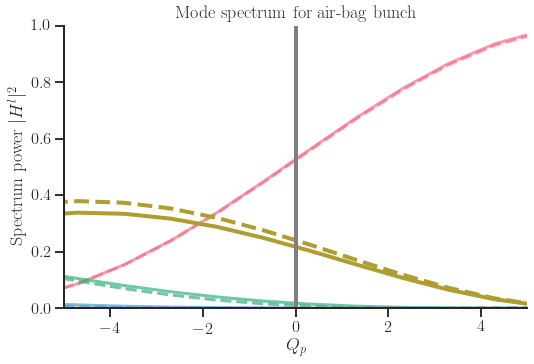

In [128]:
%%time
sbs.set(rc={'figure.figsize':(8.3,5.2),
            'text.usetex':True,
           'font.family':'serif',
           'font.size':36,
           'axes.linewidth':2,
           'lines.linewidth':4,
           'legend.fontsize':16,
           'legend.numpoints':1,},
        style='ticks',
        palette='colorblind',
        context='talk')
p = np.linspace(-1000, 1000, 2001)
Q_s = 4.47e-3
fig, ax = plt.subplots(1, 1)
palette = sbs.color_palette('husl', 5)
# ax.scatter(fftfreq, Zx_real/np.max(Zx_real), c='black', marker='.')
# ax.scatter(fftfreq, Zx_imag/np.max(Zx_imag), c='grey', marker='.')
xi_1 = -1
J_z = .25*58/(2*beta_z)
# omega0 = 2*pi*beta*c/(C)
# omega = omega_0*(p+Q_x+l*Q_s)
# omega_xi = omega_0*Q_x*xi_1/(0.00325)
# z_1 = np.sqrt(2*beta_z*J_z)*(omega_xi/c-omega/c)
# for i, m in enumerate(np.linspace(-3, 0, 4, dtype=np.int64)):
# m = -1
H_summed = 0
J_summed = 0
omega_xi = omega0*Q_x*xi_1/(eta)
print('Normalized chromatic frequency: {0:.0f}'.format(omega_xi/omega0))
plot_lines = []
for m in [0, -1, -2, -3, -4]:
    omega = omega0*(p+(Q_x-np.floor(Q_x))+m*Q_s)
    omega_xi = omega_0*Q_x*xi_1/eta
    print(Q_x-np.floor(Q_x)+m*Q_s, omega_xi/omega_0)
    z_1 = 2*sigma_z/R*(omega_xi-omega)/omega0    
#     H_summed += np.abs(H(z_1, z_2, l=m))**2
#     J_summed += np.abs(jv(m, z_1))**2
    lw = 4 if m==-1 else 3
    alpha = 1 if m==-1 else .7
    l1 = ax.plot(omega/omega0, np.abs(jv(m, z_1))**2, color=palette[np.abs(m)],
                 label='l={0:}'.format(m), linestyle='solid',
                 linewidth=lw, alpha=alpha)
#     z_2 = 10*ive(1, 1)
#     l2 = ax.plot(p, np.abs(H(z_1, z_2, l=m))**2, c=palette[m], linewidth=4, linestyle='dotted')
    z_2 = .5*ive(1, 1)
    l3 = ax.plot(omega/omega0, np.abs(H(z_1, z_2, l=m))**2,
                 c=palette[np.abs(m)], linewidth=lw,
                 linestyle='dashed', alpha=alpha)
#     z_2 = *ive(1, 1)
#     l4 = ax.plot(p, np.abs(H(z_1, z_2, l=m))**2, c=palette[m], linewidth=4)
    plot_lines.append([l1, l3])
ax.set_ylim(-0, 1)
# ax.axvline(0, color='grey', linestyle='dashdot')
# ax.axhline(0, color='grey', linestyle='dashdot')
ax.set_xlim(-50, 50)

ax.set_xlabel('$Q_p$')
ax.set_ylabel('Spectrum power $|H^l|^2$')
ax.title.set_text('Mode spectrum for air-bag bunch')
# legend1 = plt.legend(handles=[l[0] for l in plot_lines], frameon=False, loc='upper right')
# legend2 = plt.legend(handles=plot_lines[0], ['$\Delta Q/Q_{s0}=0',
#                                         '$\Delta Q/Q_{s0}=0.5',
#                                         '$\Delta Q/Q_{s0}=5',
#                                         '$\Delta Q/Q_{s0}=10'], frameon=False, loc='lower right')
# plt.figlegend(frameon=False)
# ax.add_artist(legend1)
# ax.add_artist(legend2)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.axvline(0, c='grey')
ax.set_xlim(-5, 5)
# plt.savefig('/home/vgubaidulin/PhD/Results/H-spectrumSIS100.pdf')

In [ ]:
dt_min = 1e-3/c
b1 = 40e-3
res_wall = ResistiveWall(pipe_radius=b1,
                                      resistive_wall_length=C/N_SEGMENTS,
                                      dt_min=dt_min,
                                      conductivity=1.4e6,
                            Yokoya_X1=1.0,
                            Yokoya_Y1=0.,
                            Yokoya_X2=0.,
                            Yokoya_Y2=0.)

0.06560472906350852


ValueError: x and y must have same first dimension, but have shapes (200001,) and (1,)

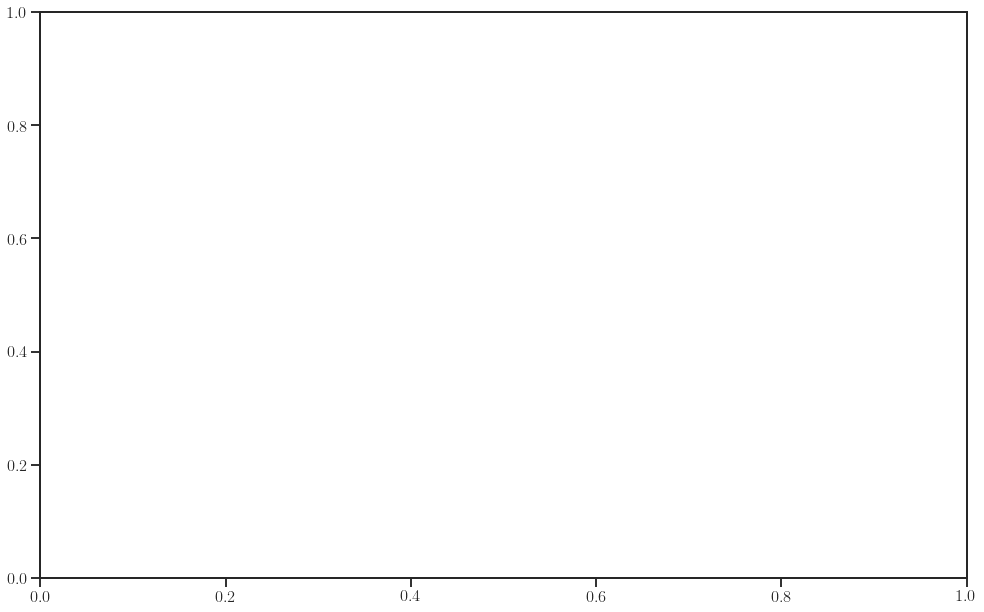

In [831]:
%%time
fig, ax = plt.subplots(1, 1)

xi_1 = 0.25
J_z = 0.06**2/(2*beta_z)
omega_0 = 2*pi*c/(26658.883)
Q_x = 60.31
omega = omega_0*(p+Q_x+l*Q_s)
omega_xi = omega_0*Q_x*xi_1/(0.00325)
z_1 = np.sqrt(2*beta_z*J_z)*(omega_xi/c)#-omega/c)
print(z_1)
# for i, m in enumerate(np.linspace(-3, 0, 4, dtype=np.int64)):
# m = -1
H_summed = 0
J_summed = 0
for m in [-2, -1, 0, 1, 2]:
    z_2 = 10*ive(1, 1)
    H_summed += np.abs(H(z_1, z_2, l=m))**2
    J_summed += np.abs(jv(m, z_1))**2
    ax.plot(p, np.abs(H(z_1, z_2, l=m))**2, c=palette[m], label='l={0:}'.format(m), linewidth=4)
    ax.plot(p, np.abs(jv(m, z_1))**2, color=palette[m], linestyle='dashed', linewidth=3)
ax.set_ylim(-0, 1)
ax.axvline(0, color='grey', linestyle='dashdot')
ax.axhline(0, color='grey', linestyle='dashdot')
# ax.set_xlim(p[0]//2, p[-1]//2)

ax.set_xlabel('$p$')
ax.set_ylabel('Spectrum power')
ax.title.set_text('Mode spectrum for air-bag bunch')
plt.figlegend(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [733]:
%%time
from scipy.special import jv, iv
from scipy.constants import c
# beta_z = 115
# J_z = 3e-4
# gamma = 27.7
# omega_0 = c/1100
# Q_s=0.017
# Q_x = 20.13
# xi_2 = np.linspace(-5000, 5000, 10000)
dQmax = 0
# z_2 = xi_2*0.125*2*J_z/beta_z/Q_s
z_2 = -dQmax/Q_s*ive(1, 1)
palette = sbs.color_palette()
m=0
# xi_1 = np.linspace(-.25, 1.5, 100)
xi_1 = np.linspace(-.25, 1.5, 50, dtype=np.float64)
# Zeff = eff_impedance(xi_1, l=m)
Zeffb = eff_impedanceb(xi_1, l=m)

CPU times: user 1min 42s, sys: 485 ms, total: 1min 42s
Wall time: 1min 13s


CPU times: user 12h 54min 7s, sys: 41.4 s, total: 12h 54min 49s
Wall time: 12h 43min 56s


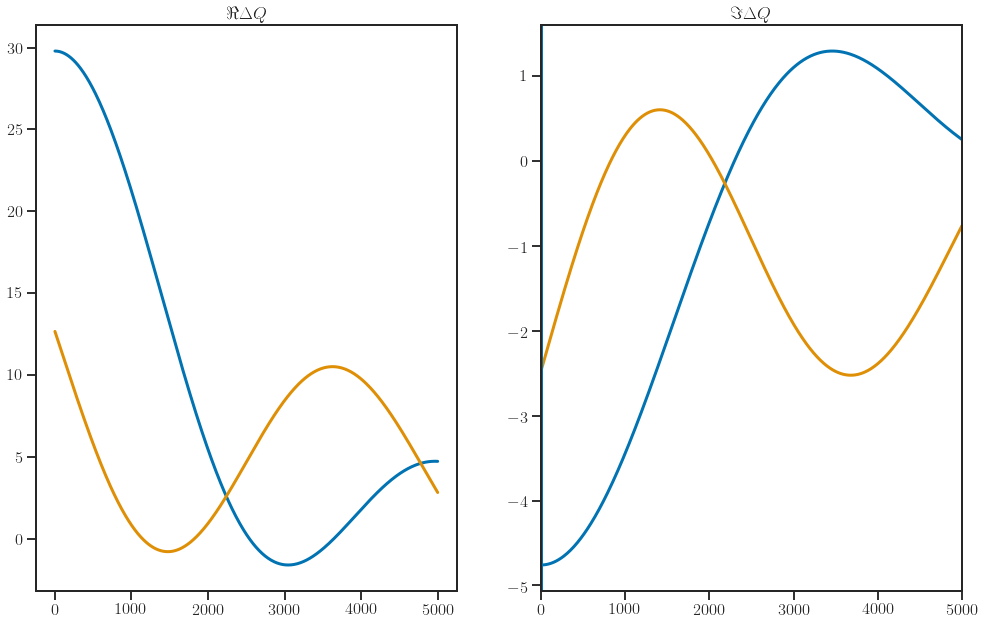

In [695]:
%%time
# Zeff *= K(0)
fig, (ax1, ax2) = plt.subplots(1, 2)
for m in [0, 1]:
# xi_1 = np.linspace(-.25, 1.5, 100)
#     xi_1 = np.linspace(-.25, 1.5, 50)
    # xi_2 = np.linspace(0, 5000, 200)
    xi_2 = np.linspace(0, 5000, 500)
    
    Zeff = K(0)*eff_impedance2(xi_2, l=m)
#     Zeffb = K(0)*eff_impedanceb(xi_1, l=m)
#     for Zeffx in [Zeff, Zeffb]:
    ax1.plot(xi_2,
             np.real(-1j*Zeff),
             label='Azimuthal mode $l={0}$'.format(m))
# plt.xlim(-.25, 1.5)
    ax2.plot(xi_2,
             np.imag(-1j*Zeff),
             label='Azimuthal mode $l={0}$'.format(m))
    ax2.set_title('$\Im\Delta Q$')
    ax1.set_title('$\Re\Delta Q$')
    ax2.axvline(0)
    ax2.set_xlim(0, 5000)
#     ax2.set_xlim(-0.25, 1.5)
# ax2.set_ylim(0, .15)

## SIS100 impedance model
|Element| Horizontal Diameter $2b_x$ [mm] | Vertical diameter $2b_y$  [mm]| Wall thickness $d_{pipe}$ [mm] | Length $L$ [m]|
| --- | --- | --- | --- | --- |
| Quadrupole Chambers | 143.44 | 65.21 | 0.3 | 282.5 |
| Dipole Chambers | 120 | 60 | 0.3 | 272.6 |
| Drift Spaces | 135 | 65 | 3 | 428.48 | 
For an round pipe equivalent one can replace: $$2b^2 = b_{x,y}(b_x+b_y)$$

Taken from https://web-docs.gsi.de/~kornilov/pdfs/Impedances_SIS100.pdf

In [655]:
L1, L2, L3 = 282.5, 272.6, 428.48
d1, d2, d3 = 0.3e-3, 0.3e-3, 3e-3
by1, by2, by3 = 0.5*65.21e-3, 0.5*60e-3, 0.5*65e-3
bx1, bx2, bx3 = 0.5*143.44e-3, 0.5*120e-3, 0.5*135e-3
b1 = np.sqrt(0.5*by1*(bx1+by1))
b2 = np.sqrt(0.5*by2*(bx2+by2))
b3 = np.sqrt(0.5*by3*(bx3+by3))
print('Beam pipe radii (cicrular beam pipe approximation) for elements listed in the table:\n {0:.2f}, {1:.2f}, {2:.2f} [mm]'.format(
b1*1e3, b2*1e3, b3*1e3))


Beam pipe radii (cicrular beam pipe approximation) for elements listed in the table:
 41.24, 36.74, 40.31 [mm]


In [96]:
import pandas as pd
import os
os.chdir('/home/vgubaidulin/PhD/Data/machine_data/LHC_IW_model_mirror/Results/LHC_ft_6.5TeV_B1_2017/')
file = pd.read_csv('wakeforhdtl_PyZbase_Allthemachine_6p5TeV_B1_LHC_ft_6.5TeV_B1_2017_WF_dip.dat',
                   header=None, sep='\t')
t = file[0]
Wx = file[1]
Wy = file[2]

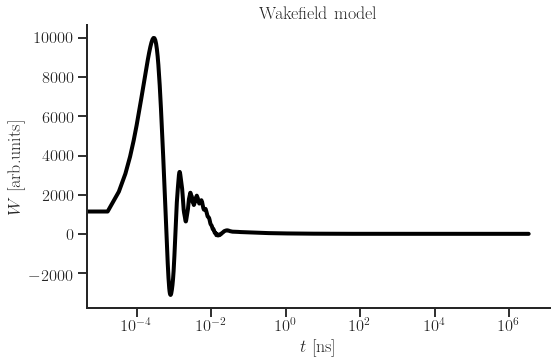

In [97]:
import seaborn as sbs
from matplotlib import pyplot as plt
sbs.set(rc={'figure.figsize':(8.3,5.2),
            'text.usetex':True,
           'font.family':'serif',
           'font.size':36,
           'axes.linewidth':2,
           'lines.linewidth':4,
           'legend.fontsize':20,
           'legend.numpoints':1,},
        style='ticks',
        palette='colorblind',
        context='talk')
t_plot = t[:2000]
Wy_plot = Wy[:2000]
t_RW=t[2000:]
Wy_RW=Wy[2000:]
fig, ax = plt.subplots(1, 1)
# plt.plot(t_plot, Wy_plot, marker='.', linewidth=1)
ax.semilogx(t, Wx, c='black')
# ax.plot(t, Wy)

# plt.plot(np.diff(t[:2000]), marker='.')
ax.set_title('Wakefield model')
ax.set_xlabel('$t$ [ns]')
ax.set_ylabel('$W$ [arb.units]')
# ax.set_xlim(0.015, .016)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.minorticks_on()
plt.savefig('/home/vgubaidulin/PhD/Results/wakefield_model.pdf')
plt.show()

In [98]:
from scipy.constants import pi, c
t_z=t[2000:]
Wx_z=Wy[2000:]
Zx = np.fft.fft(1j*Wx_z)
F_sampling = 1/np.mean(1e-9*np.diff(t_z))
F_rev = c/(27e3)
fftfreq = F_sampling/F_rev*np.fft.fftfreq(Wx_z.shape[0])

In [99]:
Zx_RW = Zx
fftfreq_RW = fftfreq

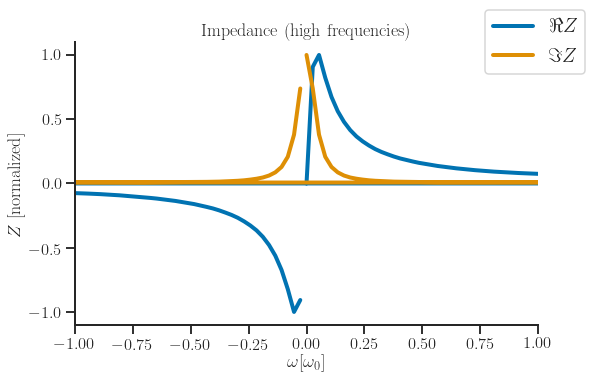

In [101]:
fig, ax = plt.subplots(1, 1)
ax.plot(fftfreq, np.real(Zx)/np.max(np.real(Zx)),
           label='$\Re Z$',)
ax.plot(fftfreq, np.imag(Zx)/np.max(np.imag(Zx)),
           label='$\Im Z$',)
# plt.xlim(-2e8, 2e8)
ax.set_xlabel('$\omega [\omega_0]$')
ax.set_ylabel('$Z$ [normalized]')
plt.figlegend()
np.save('/home/vgubaidulin/PhD/Results/Zreal_LHC.npy', np.real(Zx))
np.save('/home/vgubaidulin/PhD/Results/Zimag_LHC.npy', np.imag(Zx))
np.save('/home/vgubaidulin/PhD/Results/Zfreq_LHC.npy', fftfreq)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlim(-1, 1)
ax.set_title('Impedance (high frequencies)')
plt.show()

17476.896053568198 0.3100000000000023
CPU times: user 21.4 s, sys: 95.4 ms, total: 21.5 s
Wall time: 20.9 s


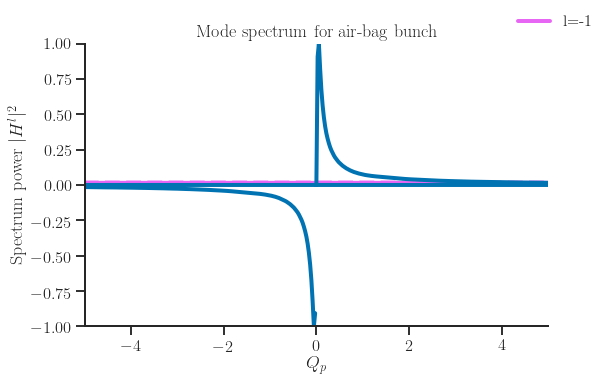

In [107]:
%%time
sbs.set(rc={'figure.figsize':(8.3,5.2),
            'text.usetex':True,
           'font.family':'serif',
           'font.size':36,
           'axes.linewidth':2,
           'lines.linewidth':4,
           'legend.fontsize':16,
           'legend.numpoints':1,},
        style='ticks',
        palette='colorblind',
        context='talk')
p = np.linspace(-1000000, 1000000, 200001)
Q_s = 1.74e-3
fig, ax = plt.subplots(1, 1)
palette = sbs.color_palette('husl')
beta_z = 815
xi_1 = .1
J_z = 0.06**2/(2*beta_z)
omega_0 = 2*pi*c/(26658.883)
Q_x = 60.31
H_summed = 0
J_summed = 0
ETA = 0.00034508416034028375
plot_lines = []
for m in [-1,]:
    omega = omega_0*(p+Q_x+m*Q_s)
    omega_xi = omega_0*Q_x*xi_1/(ETA)
    print(omega_xi/omega_0, Q_x-np.floor(Q_x))
    z_1 = np.sqrt(2*beta_z*J_z)*(omega_xi-omega)/c
    lw = 4 if m==-1 or m==1 else 3
    alpha = 1 if m==-1 or m==1 else .7
    l1 = ax.plot(omega/omega_0, np.abs(jv(m, z_1))**2,
                 color=palette[m],
                 label='l={0:}'.format(m),
                 linestyle='solid',
                 linewidth=lw,
                 alpha=alpha)
    z_2 = .5*ive(1, 1)
    l3 = ax.plot(omega/omega_0, np.abs(H(z_1, z_2, l=m))**2,
                 c=palette[m],
                 linewidth=lw,
                 alpha=alpha,
                 linestyle='dashed')
    plot_lines.append([l1, l3])

ax.set_xlabel('$Q_p$')
ax.set_ylabel('Spectrum power $|H^l|^2$')
ax.title.set_text('Mode spectrum for air-bag bunch')
plt.figlegend(frameon=False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_ylim(-1., 1.)
ax.set_xlim(-5, 5)
ax.plot(fftfreq, np.real(Zx)/np.max(np.real(Zx)),
           label='$\Re Z$',)
# ax.plot(fftfreq, np.imag(Zx)/np.max(np.imag(Zx)),
#            label='$\Im Z$',)

In [ ]:
pipe_radius=0.015
resistive_wall_length=26658.883
conductivity=1.4e6